# Compresor de Imagen
IDEA en pocas palabras: en lugar de usar todos los colores posibles (combinaciones de 0 a 255 de los tres valores de Red Blue y Green) usamos una cantidad limitada que nosotros elegimos mediante un algoritmo de clustering.

Explicación: Tomamos como datasets todos los pixeles, y los ponemos en el espacio de los tres valores de R G y B. y luego hacemos un proceso de clustering con K-means. La idea es que, en lugar de usar la escala de 0 a 255 en RGB para representar la imagen, usamos los valores de los K centroides. El sustento detrás de este método es que pixeles cercanos en la foto tendrán valores muy parecidos de RGB, con algún mínimo cambio. Por ejemplo, de haber una pared blaca en el fondo, todos los pixeles correspondientes a esa pared estaran muy cerca del (255,255,255) que es el Blanco puro en RGB. En lugar de usar un valor distinto para cada uno de estos pixeles, usamos un unico valor para definir el colo de todos ellos.

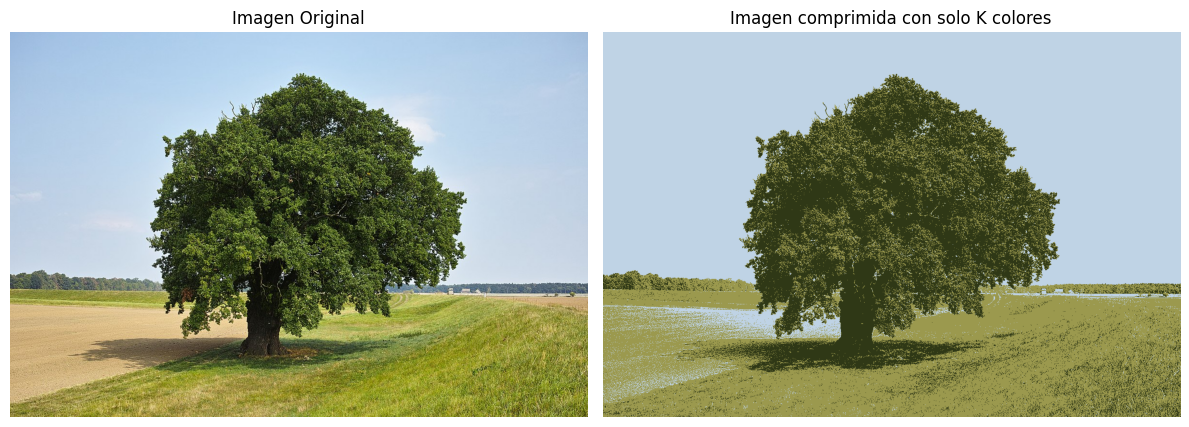

In [41]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Leemos la imagen obejtivo
img = imread('arbol.jpg')
img_size = img.shape

# Definimos el numero de Clusters (colores) a usar
K= 3

# Cambiamos sus dimensiones para que nos queden como instancias (filas) los pixeles
# y como features (columnas) el valor correspondiente a Red, Blue y Green de cada uno.
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Corremos el algoritmo de clustering
km = KMeans(n_clusters=K)
km.fit(X)

# Usamos los centroides para comprimir la imagen

# Armamos un nuevo X donde en lugar de valores cualquiera en RGB ponemos alguno de los K clusters
X_compressed = km.cluster_centers_[km.labels_]

# Por las dudas nos aseguramos que los valores esten en la unidad y el rango correcto para una imagen jpg
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Volvemos la imagen a la forma original que debe tener
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Graficamos las imagenes una al lado de la otra
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Imagen Original')
ax[1].imshow(X_compressed)
ax[1].set_title('Imagen comprimida con solo K colores')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();